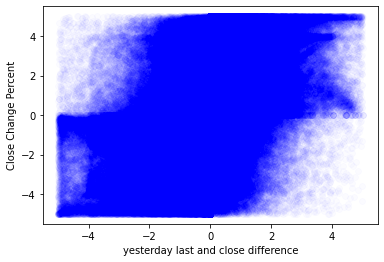

In [2]:
from tsetmc.Get import all_tickers, trade_history
import matplotlib.pyplot as plt

ALL = all_tickers(stock_rights=False)
result = {}

plt.xlabel("yesterday last and close difference")
plt.ylabel("Close Change Percent")


for num_id in ALL.index:
    try:
        df = trade_history(num_id, adjust=True).iloc[1:]
    except Exception as e:
        print(e)
    df = df.astype("int32")

    # Close Change Percent:
    df["ccp"] = (df["close"] - df["yesterday"]) / df["yesterday"] * 100

    # close-price and last-price difference in yesterday:
    df["yesterday_diff"] = (df["last"] - df["close"]) / df["yesterday"] * 100
    df["yesterday_diff"] = df["yesterday_diff"].shift(1)

    # filter low trade days:
    df = df[df["count"] > 50]

    # drop outlier data:
    df = df[(df["ccp"] <= 5) & (df["ccp"] >= -5)]
    df = df[(df["yesterday_diff"] <= 5) & (df["yesterday_diff"] >= -5)]
    
    # plotting:
    plt.scatter(df["yesterday_diff"], df["ccp"], color="#0000ff04")

plt.show()    
